<a href="https://colab.research.google.com/github/rugadamanikanta/seoul-bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

# <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.



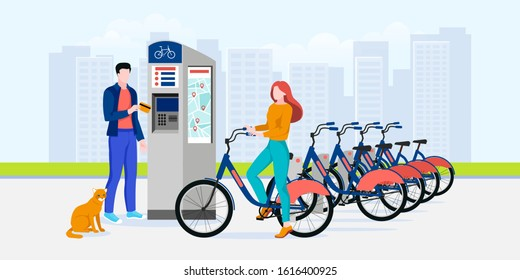


















## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/alma better/capston/Copy of SeoulBikeData.csv',encoding='ISO-8859-1')

In [4]:
df.shape

(8760, 14)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

we are checking any null values in given Data. we found no that there is  no missing values in given data.

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df.head(25)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


From following Information we have data for Round the around year(365 Days) with round the Day(24 Hours). 

In [9]:
print(len(df['Date'].unique()),len(df['Hour'].unique()))
print(len(df['Date'].unique())*len(df['Hour'].unique()))

365 24
8760


Text(0.5, 1.0, 'Box plot on Rented Bike Demand ')

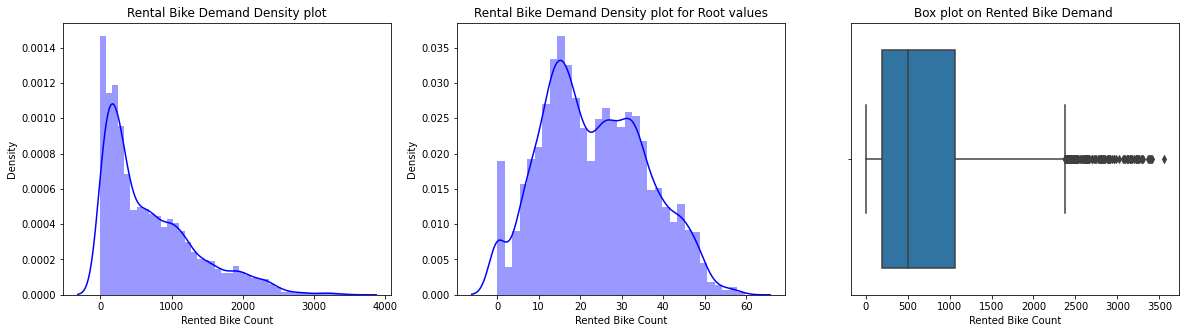

In [10]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.title('Data distubution regarding Rented Bike count ')
ax1=plt.subplot(1,3,1)
sns.distplot(df['Rented Bike Count'],color="b")
plt.title('Rental Bike Demand Density plot')
ax2=plt.subplot(1,3,2)
sns.distplot(np.sqrt(df['Rented Bike Count']),color="b")
plt.title('Rental Bike Demand Density plot for Root values')
ax3=plt.subplot(1,3,3)
sns.boxplot(df['Rented Bike Count'])
plt.title('Box plot on Rented Bike Demand ')

In [11]:
min(df['Rented Bike Count']),max(df['Rented Bike Count'])

(0, 3556)

From following data we can see that how many day's in a season and Bike demand distubution seasonal wise.

In [12]:
a=df.groupby(['Seasons'])['Date'].count()
a/24

Seasons
Autumn    91.0
Spring    92.0
Summer    92.0
Winter    90.0
Name: Date, dtype: float64

Text(0.5, 1.0, 'Bike demand season wise')

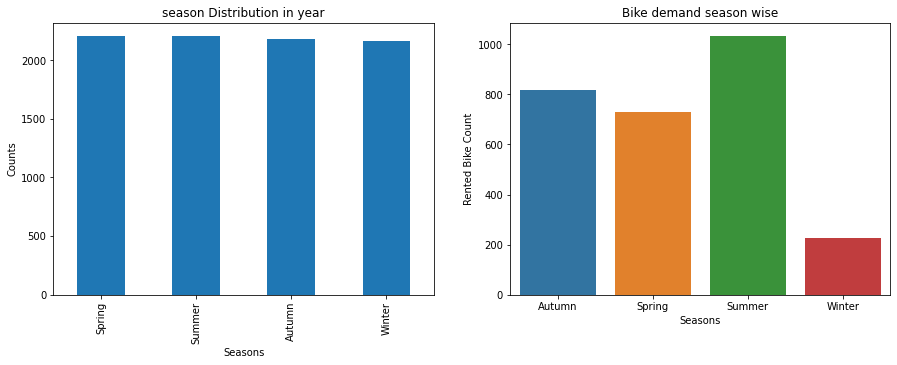

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
df['Seasons'].value_counts().plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('Counts')
plt.title('season Distribution in year')
ax2=plt.subplot(1,2,2)
seasonal_demand=pd.DataFrame(df.groupby(['Seasons'])['Rented Bike Count'].mean())
sns.barplot(x=seasonal_demand.index,y=seasonal_demand['Rented Bike Count'])
plt.title('Bike demand season wise')

From following Data distribution we can see holiday disribution in year and bike demand holiday wise

In [14]:
a=df.groupby(['Holiday'])['Date'].count()
a/24

Holiday
Holiday        18.0
No Holiday    347.0
Name: Date, dtype: float64

Text(0.5, 1.0, "Bike demand on Holiday's and No Holiday's")

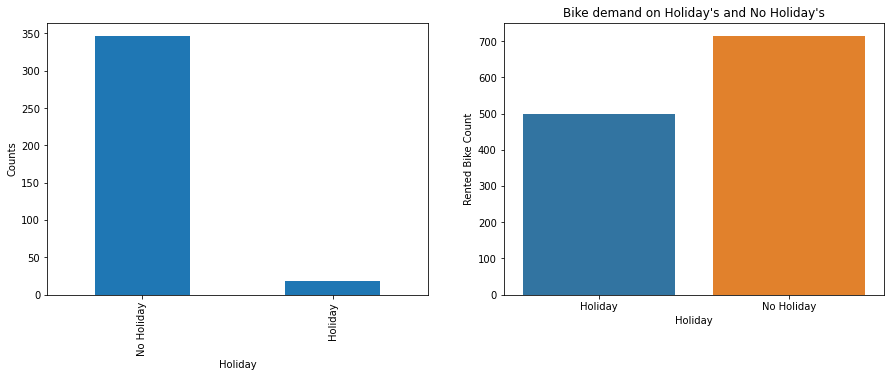

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
(df['Holiday'].value_counts()/24).plot(kind='bar')
plt.xlabel('Holiday')
plt.ylabel('Counts')
ax2=plt.subplot(1,2,2)
Holiday_demand=pd.DataFrame(df.groupby(['Holiday'])['Rented Bike Count'].mean())
sns.barplot(x=Holiday_demand.index,y=Holiday_demand['Rented Bike Count'])
plt.title("Bike demand on Holiday's and No Holiday's")

In [16]:
df.groupby(['Functioning Day'])['Date'].count()

Functioning Day
No      295
Yes    8465
Name: Date, dtype: int64

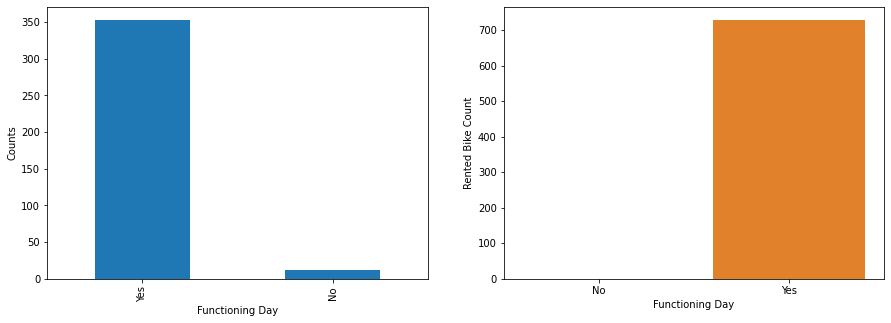

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
(df['Functioning Day'].value_counts()/24).plot(kind='bar')
plt.xlabel('Functioning Day')
plt.ylabel('Counts')
ax2=plt.subplot(1,2,2)
Functioning_demand=pd.DataFrame(df.groupby(['Functioning Day'])['Rented Bike Count'].mean())
sns.barplot(x=Functioning_demand.index,y=Functioning_demand['Rented Bike Count'])

Following plot shows cumlulative Bike demand for 24 hrs for 1 year. we have 2 peak hrs in day, it was look like office and school times.

Text(0.5, 1.0, 'Bike Demand Hourly wise')

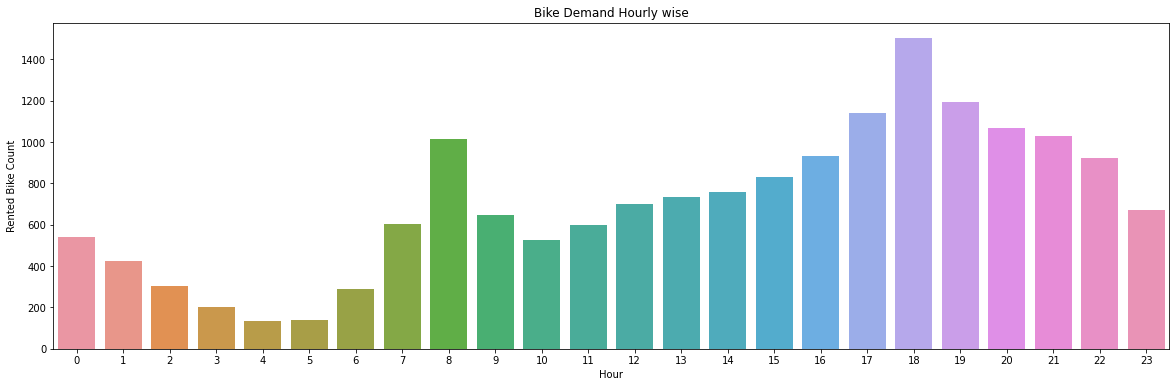

In [18]:
fig, ax = plt.subplots(figsize=(20,6))
hourly_demand_mean=pd.DataFrame(df.groupby(['Hour'])['Rented Bike Count'].mean())
sns.barplot(x=hourly_demand_mean.index,y=hourly_demand_mean['Rented Bike Count'])
plt.title("Bike Demand Hourly wise")

Text(0.5, 1.0, 'Bike Demand Hourly wise')

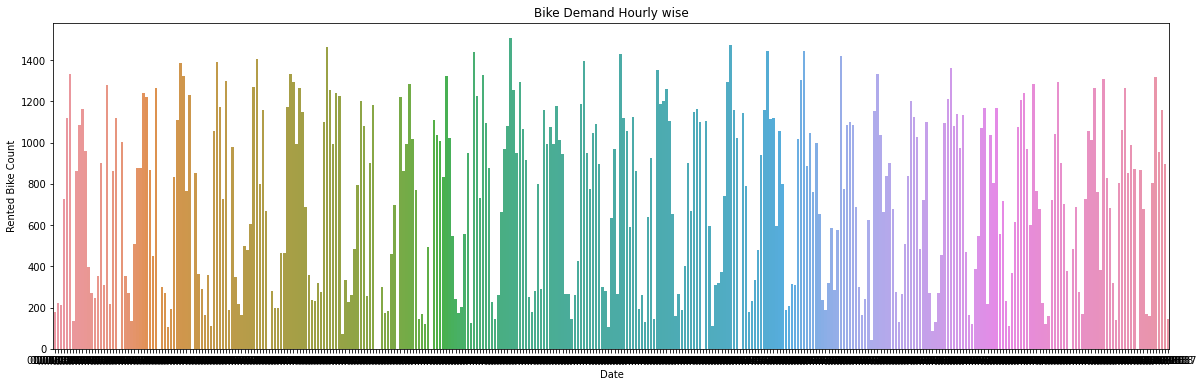

In [19]:
fig, ax = plt.subplots(figsize=(20,6))
hourly_demand_mean=pd.DataFrame(df.groupby(['Date'])['Rented Bike Count'].mean())
sns.barplot(x=hourly_demand_mean.index,y=hourly_demand_mean['Rented Bike Count'])
plt.title("Bike Demand Hourly wise")

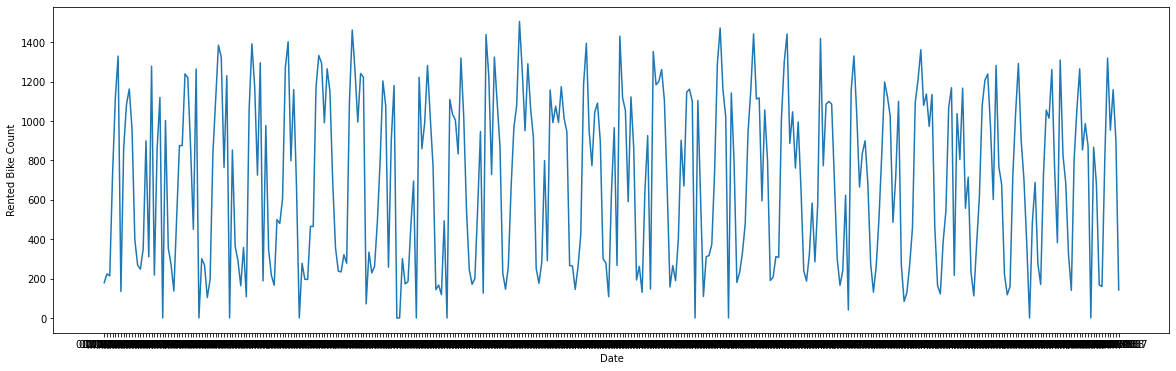

In [20]:
fig, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x=hourly_demand_mean.index,y=hourly_demand_mean['Rented Bike Count'])

In [21]:
feature_count=[]
df_count=pd.DataFrame()
df_count['features']=df.columns
for i in df.columns:
  feature_count.append(df[i].nunique())
df_count['unique_values']=feature_count

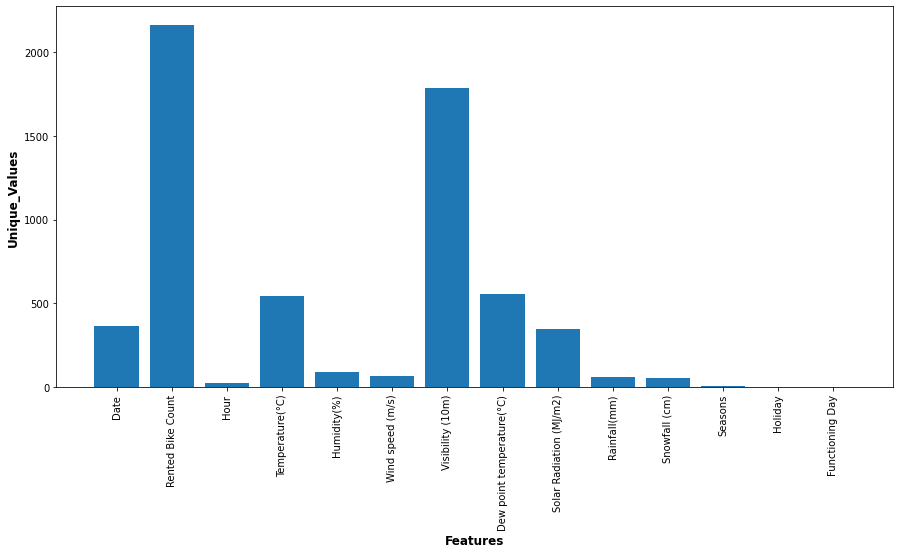

In [22]:
ax=plt.figure(figsize=(15,7))
plt.bar('features','unique_values',data=df_count)
plt.xticks(rotation=90)
plt.xlabel('Features',size=12,weight='bold')
plt.ylabel('Unique_Values',size=12,weight='bold')
plt.show()

Before Altering Data we are creating a copy of original data set

In [23]:
dfcopy=df.copy()

In [24]:
dfcopy['Date']=pd.to_datetime(dfcopy['Date'])

In [25]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

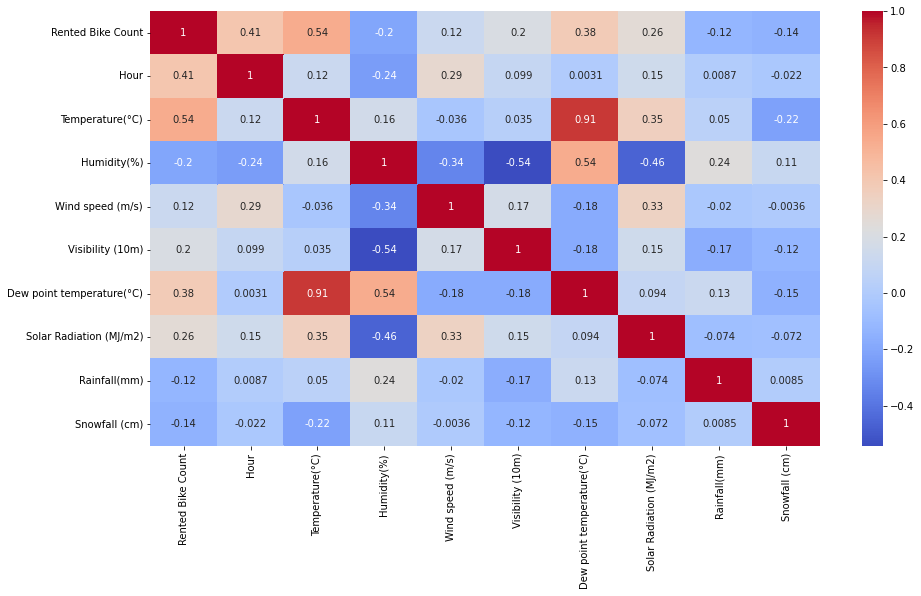

In [26]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [27]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

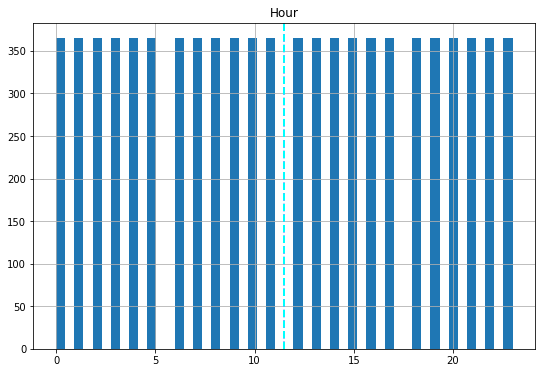

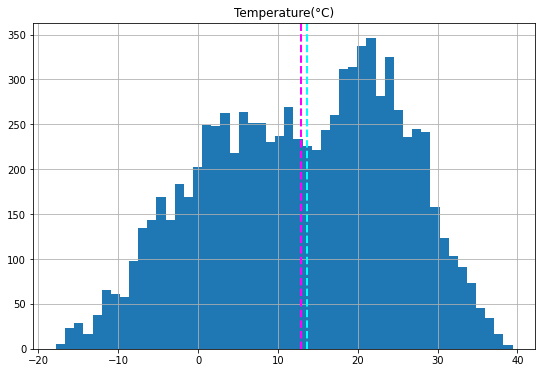

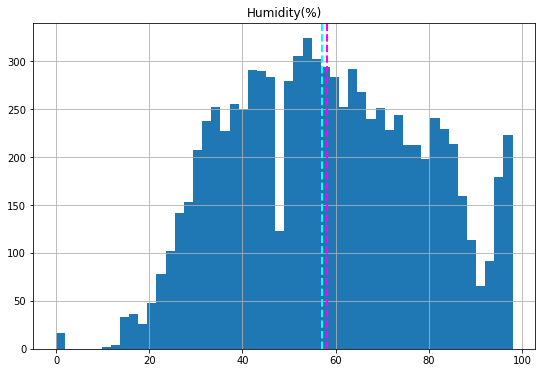

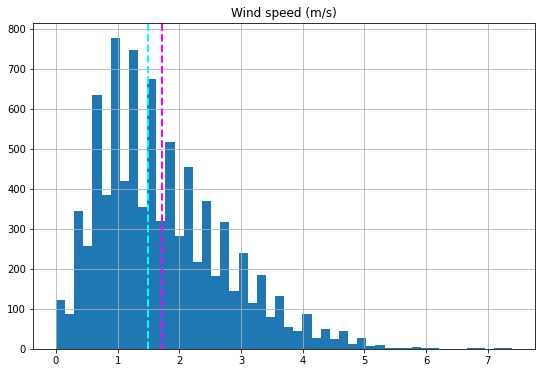

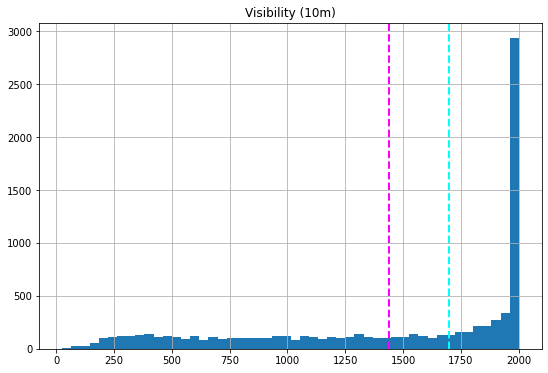

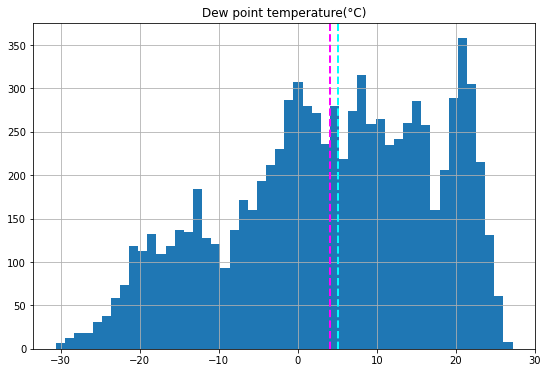

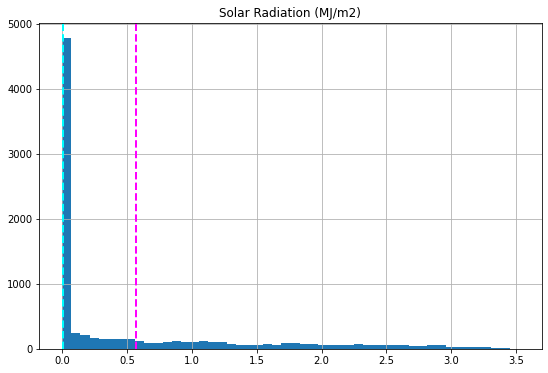

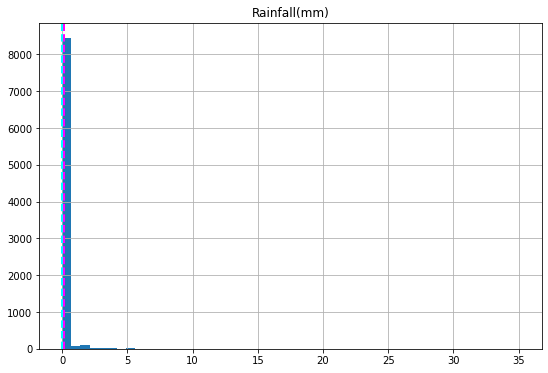

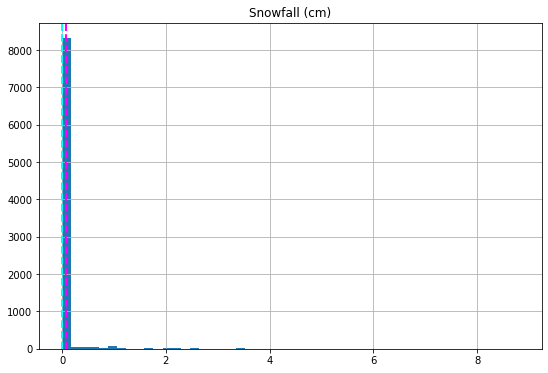

In [28]:
#@title Default title text
# plot a bar plot for each numerical feature count (Rented Bike Count)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [29]:
categorical_features = df.describe(include=['object','category']).columns

In [30]:
categorical_features

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

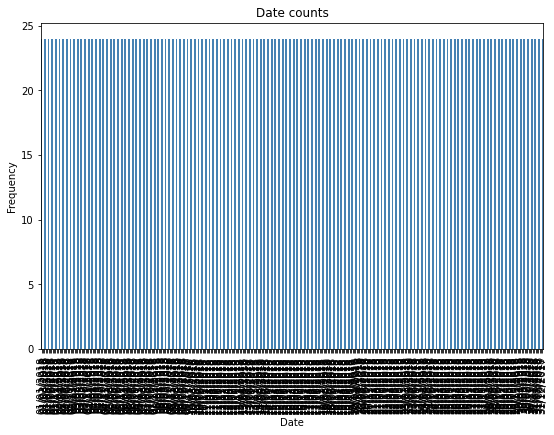

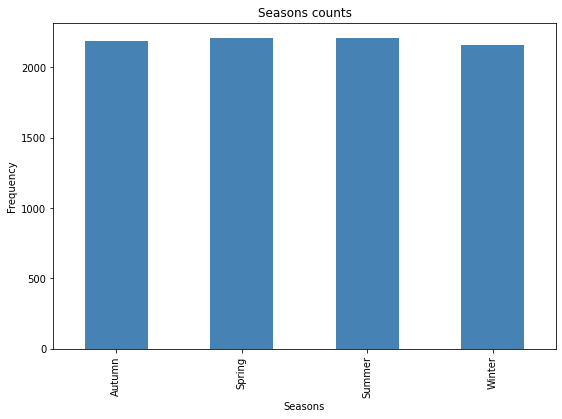

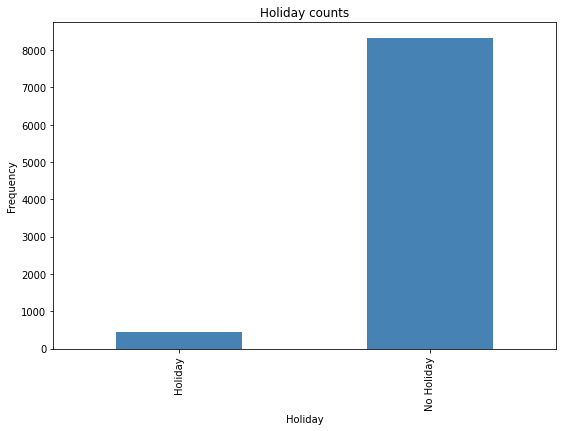

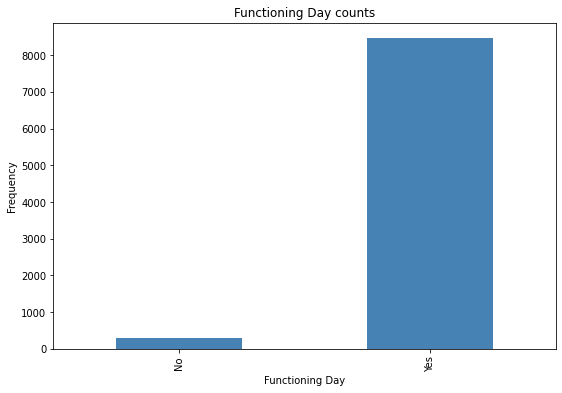

In [31]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

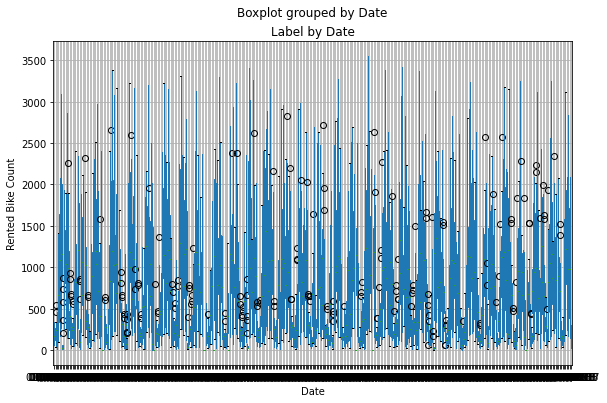

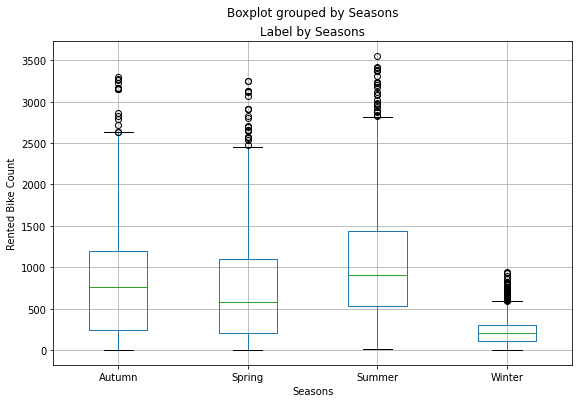

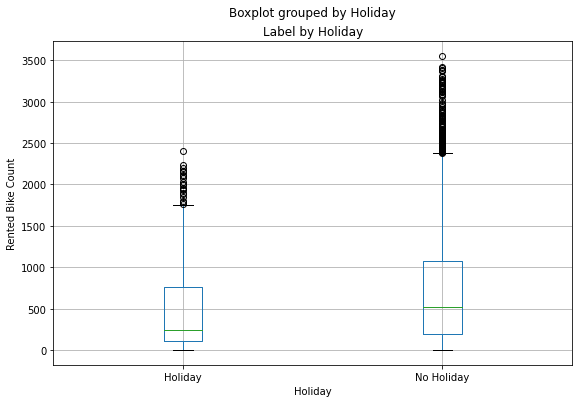

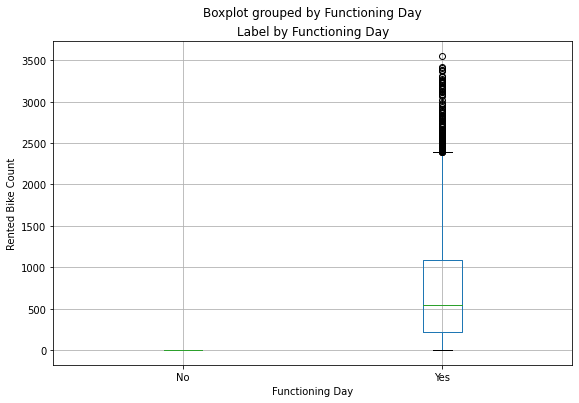

In [32]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfcopy['Seasons']=le.fit_transform(dfcopy['Seasons'])
dfcopy['Holiday']=le.fit_transform(dfcopy['Holiday'])
dfcopy['Functioning Day']=le.fit_transform(dfcopy['Functioning Day'])

In [34]:
df.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4e3b842d0>,
      dtype=object)

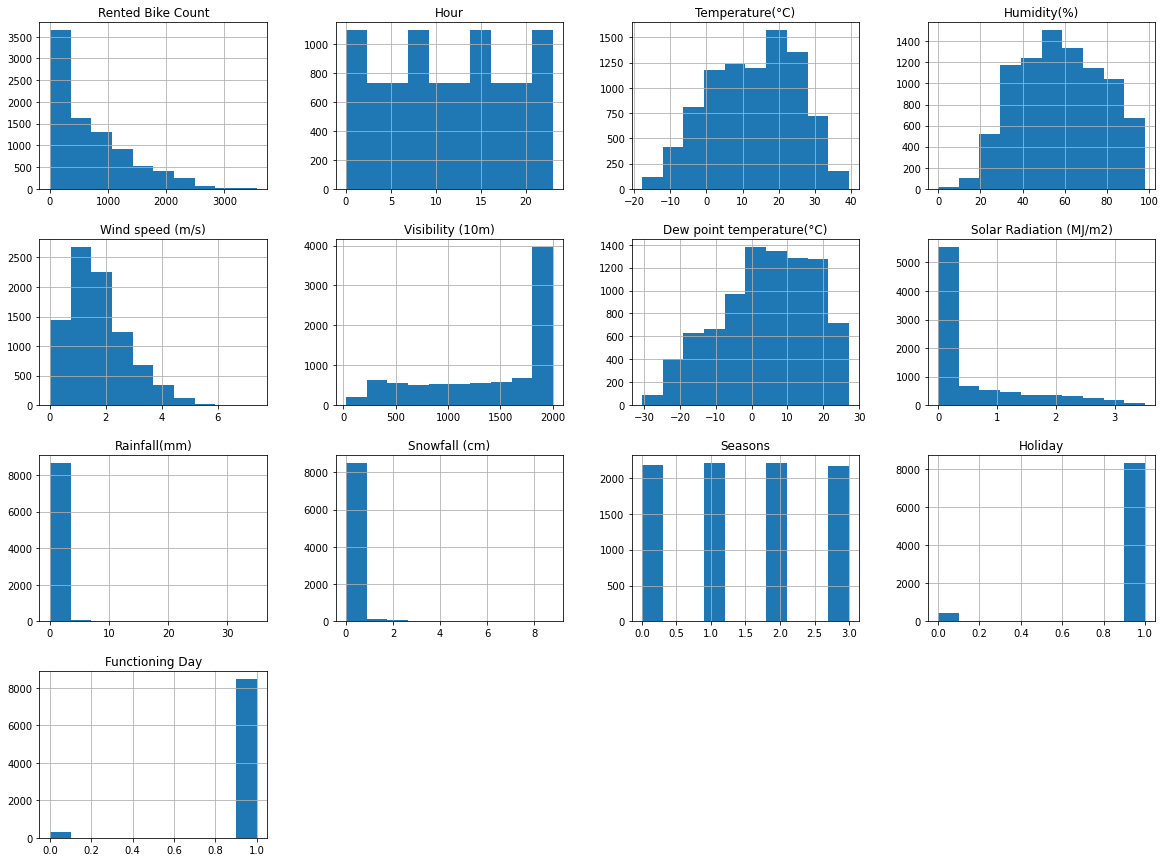

In [35]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
dfcopy.hist(ax = ax)

In [36]:
dfcopy.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1


In [37]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   int64         
 12  Holida

This was corrliation heat map after converting funtion variables with dependent variable.


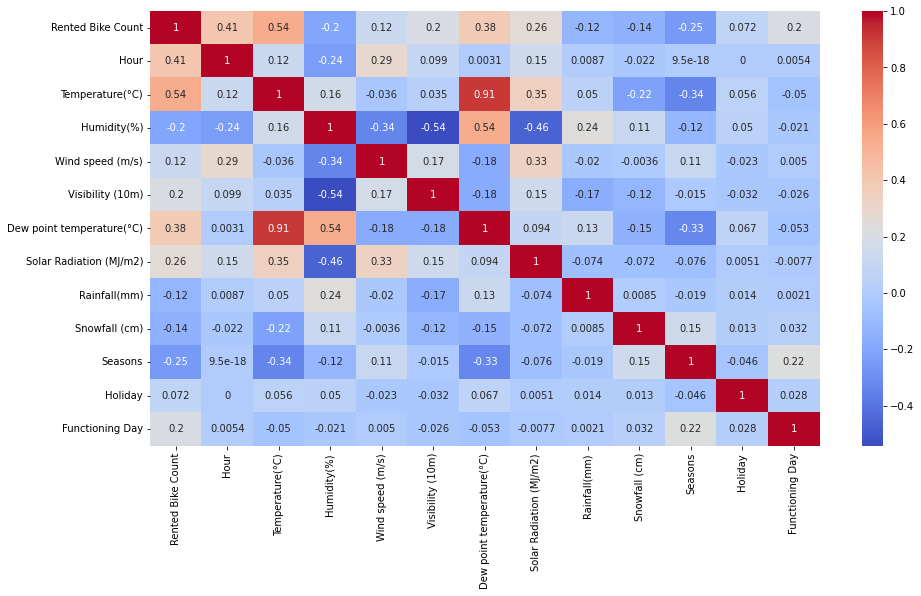

In [38]:
plt.figure(figsize=(15,8))
correlation = dfcopy.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [39]:
dfcopy.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.495890,0.950685,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.000000,1.000000,1.000000


In [40]:
dfcopy['Date'] = dfcopy['Date'].values.astype(float)


VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

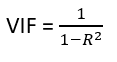

In [41]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

As we have to check multicolinirity between independent variable so we have remove the dependent **Rented Bike Count** variable from data while checking

In [42]:
calc_vif(dfcopy[[i for i in dfcopy.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Date,439.148897
1,Hour,0.999868
2,Temperature(°C),1.005364
3,Humidity(%),1.002410
4,Wind speed (m/s),0.998074
5,Visibility (10m),1.003109
6,Dew point temperature(°C),1.001465
7,Solar Radiation (MJ/m2),1.000702
8,Rainfall(mm),1.000007
9,Snowfall (cm),0.999722


we are removing **Date** column from data as it was showing higher VIF value 

In [43]:
calc_vif(dfcopy[[i for i in dfcopy.describe().columns if i not in ['Rented Bike Count','Date']]])


,variables,VIF
0,Hour,4.423441
1,Temperature(°C),50.713869
2,Humidity(%),25.015753
3,Wind speed (m/s),4.845957
4,Visibility (10m),9.154873
5,Dew point temperature(°C),29.456993
6,Solar Radiation (MJ/m2),2.884145
7,Rainfall(mm),1.083402
8,Snowfall (cm),1.128297
9,Seasons,3.369966


After removing "Date" we have seen High colinirity in Temprature column but most of all other variabels depends on temprature. So i did experiment instead of **Temperature** i have removing **Dew point temprature**

In [44]:
calc_vif(dfcopy[[i for i in dfcopy.describe().columns if i not in ['Rented Bike Count','Date','Dew point temperature(°C)']]])
# even temprature has high VIF but temperature will influnce all other factors so i amm moving dew point temp column

,variables,VIF
0,Hour,4.182308
1,Temperature(°C),3.596720
2,Humidity(%),13.434638
3,Wind speed (m/s),4.742570
4,Visibility (10m),7.095727
5,Solar Radiation (MJ/m2),2.486505
6,Rainfall(mm),1.083303
7,Snowfall (cm),1.127967
8,Seasons,3.358084
9,Holiday,17.052249


Hear we Removing functioning day column as it having high VIF


In [45]:
final_var=calc_vif(dfcopy[[i for i in dfcopy.describe().columns if i not in ['Rented Bike Count','Date','Dew point temperature(°C)','Functioning Day']]])
final_var
# hear we droping functioning day collumn as it having high VIF

,variables,VIF
0,Hour,4.084468
1,Temperature(°C),3.574708
2,Humidity(%),10.297304
3,Wind speed (m/s),4.725575
4,Visibility (10m),6.183682
5,Solar Radiation (MJ/m2),2.393706
6,Rainfall(mm),1.081713
7,Snowfall (cm),1.126836
8,Seasons,3.021474
9,Holiday,15.423590


In [46]:
# we will drop humidity as we have high vif
calc_vif(dfcopy[[i for i in dfcopy.describe().columns if i not in ['Rented Bike Count','Date','Dew point temperature(°C)','Humidity(%)','Functioning Day']]])

,variables,VIF
0,Hour,4.077068
1,Temperature(°C),2.828155
2,Wind speed (m/s),4.681902
3,Visibility (10m),6.037768
4,Solar Radiation (MJ/m2),1.906436
5,Rainfall(mm),1.053747
6,Snowfall (cm),1.097913
7,Seasons,2.920345
8,Holiday,8.367129


For moving forward i permently droping only **Date, Dew point Temprature and Humidity** by comapring comapring colinirity table and VIF values.

In [47]:
dfcopy.drop(['Date','Dew point temperature(°C)','Humidity(%)'], axis = 1,inplace=True)

From following correliation table we can see there is no corelation any individual data 

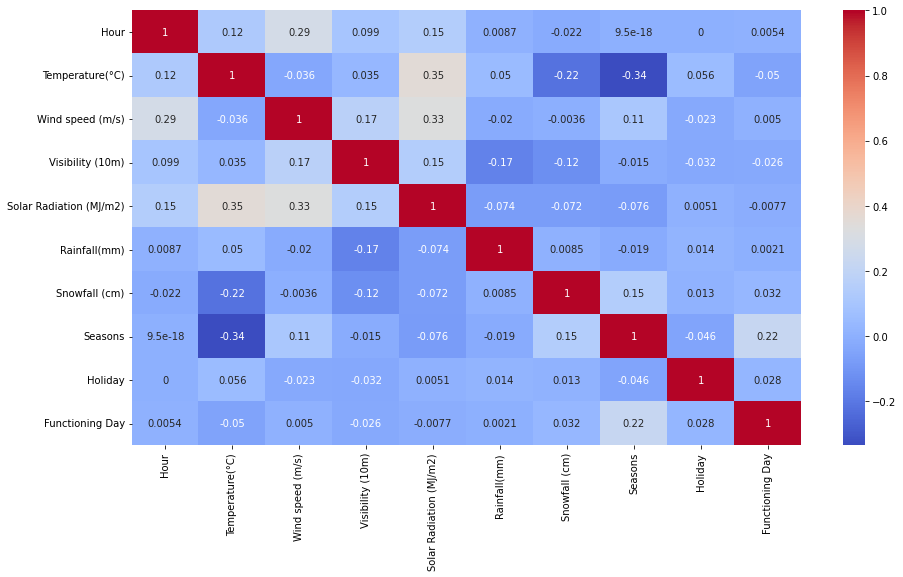

In [48]:
plt.figure(figsize=(15,8))
correlation = dfcopy.iloc[:,1:].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

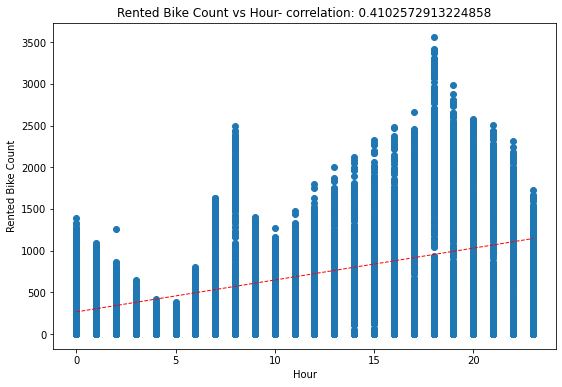

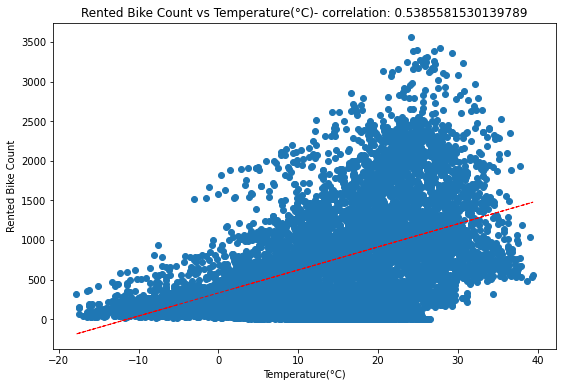

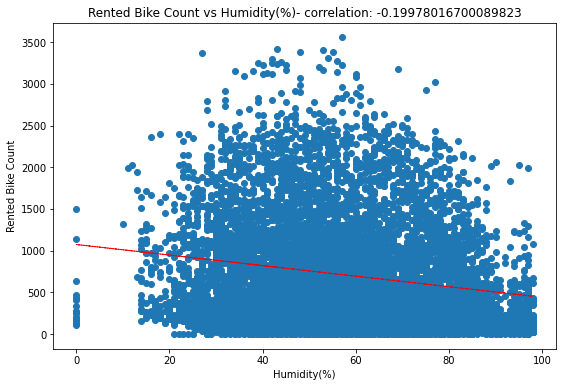

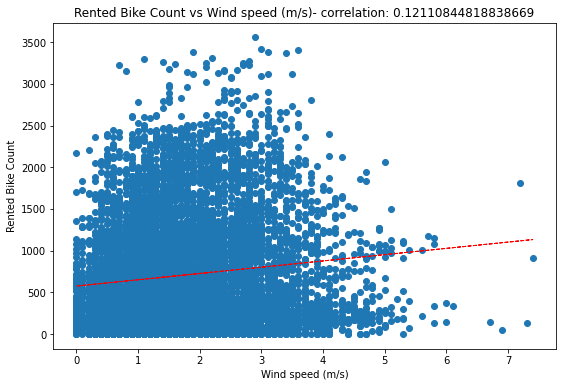

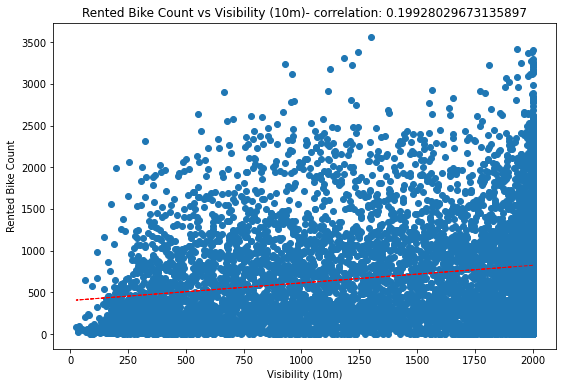

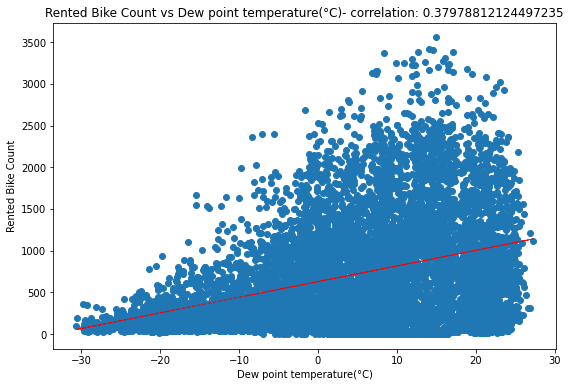

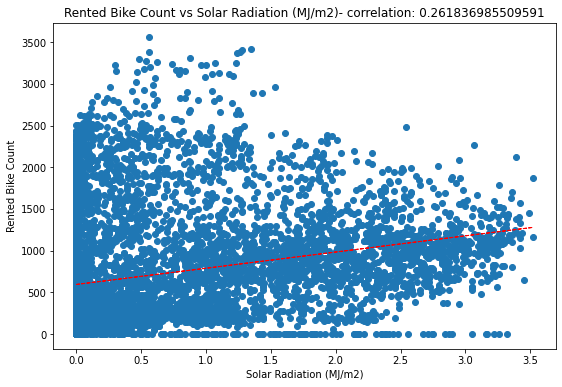

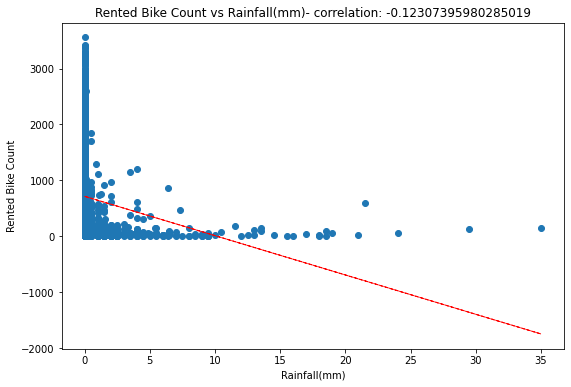

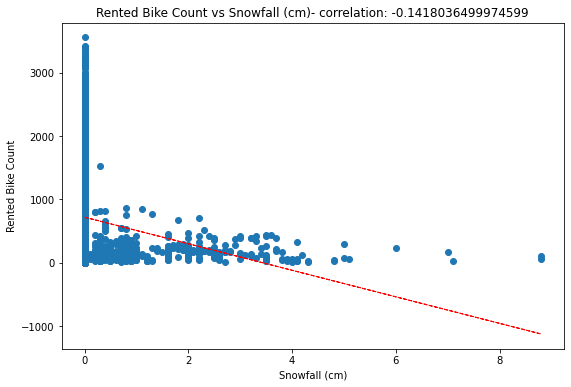

In [49]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

# Linear Regression

In [50]:
# from corleation and vif we are removing date,humidity and dew point temperature.


In [51]:
Final_feature=['Hour', 'Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day']

In [52]:
from scipy.stats import zscore
X=dfcopy[Final_feature].apply(zscore)

In [53]:
y=np.sqrt(dfcopy['Rented Bike Count'])

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 10)
(1752, 10)


In [55]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [56]:
reg.score(X_train, y_train)

0.6260645832736127

In [57]:
reg.score(X_test, y_test)

0.6233795823229134

In [58]:
reg.intercept_

23.518957819849458

In [59]:
reg.coef_

array([ 3.8016503 ,  5.50995051,  0.21096125,  1.65007584,  0.63655164,
       -2.0096782 , -0.28024663, -2.16904091,  0.60633922,  5.15728146])

In [60]:
# Validating Assumptions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import math
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2 is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [62]:
# Evaluation of training Data
print_metrics(np.square(y_train),np.square(y_train_pred))
print("Adjusted R2 is ",1-(1-r2_score(np.square(y_train), np.square(y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 186191.85069828155
RMSE is 431.499537309464
R2 is 0.5516075130888267
MAE is 289.66482617092703
MAPE is inf
Adjusted R2 is  0.5509666777495225


In [63]:
# Test dataset metrics
print_metrics(np.square(y_test), np.square(y_test_pred))
print("Adjusted R2 is ",1-(1-r2_score(np.square(y_test), np.square(y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 190364.7663483764
RMSE is 436.30810942311905
R2 is 0.5451505567443524
MAE is 290.844288312418
MAPE is inf
Adjusted R2 is  0.5425379809645956


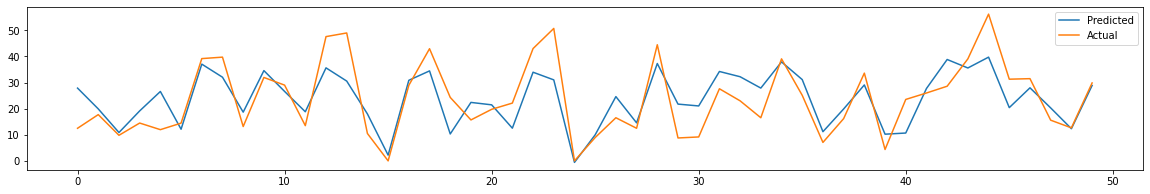

In [64]:
plt.figure(figsize=(20,3))
plt.plot((y_test_pred[100:150]))
# plt.plot(np.square(y_test))

plt.plot(np.array((y_test[100:150])))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'Predicted')

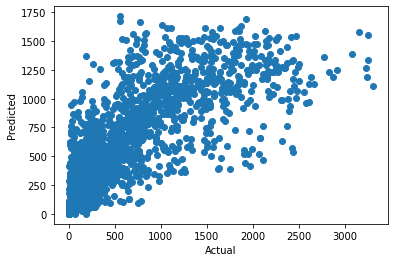

In [65]:
plt.scatter(np.square(y_test),np.square( y_test_pred))
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Linear Regression-Lasso

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [67]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -57.95084957759758


In [68]:

lasso  = Lasso(alpha=0.0014 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0014, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
g=lasso.predict(X_test)

In [70]:
lasso.score(X_train, y_train)

0.626064488519228

In [71]:
lasso.intercept_

23.51896902796278

In [72]:
lasso.coef_

array([ 3.80073867,  5.5094654 ,  0.20994608,  1.64924601,  0.63621923,
       -2.00841638, -0.27925377, -2.16751783,  0.60506114,  5.15546192])

In [73]:
y_train_pred_lasso = lasso_regressor.predict(X_train)
y_test_pred_lasso = lasso_regressor.predict(X_test)

In [74]:
# Evaluation of training Data for lasso
print_metrics(np.square(y_train),np.square(y_train_pred_lasso))
print("Adjusted R2 is ",1-(1-r2_score(np.square(y_train), np.square(y_train_pred_lasso)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 186214.60633052644
RMSE is 431.52590458804025
R2 is 0.5515527123309243
MAE is 289.67849408789345
MAPE is inf
Adjusted R2 is  0.5509117986712572


In [75]:
# Test dataset metrics for lasso
print_metrics(np.square(y_test), np.square(y_test_pred_lasso))
print("Adjusted R2 is ",1-(1-r2_score(np.square(y_test), np.square(y_test_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 190386.6571128263
RMSE is 436.33319506178566
R2 is 0.5450982518866129
MAE is 290.8570142383386
MAPE is inf
Adjusted R2 is  0.5424853756768864


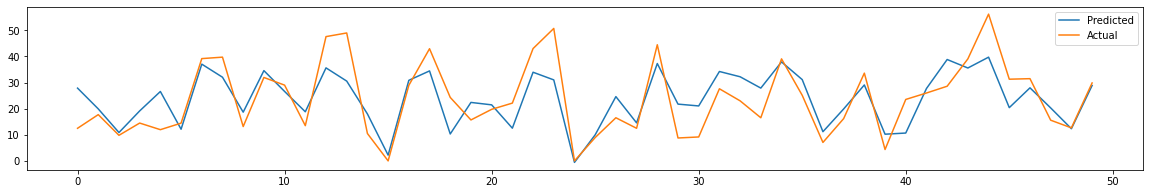

In [76]:
plt.figure(figsize=(20,3))
plt.plot((y_test_pred_lasso[100:150]))
plt.plot((np.array(y_test[100:150])))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'Predicted')

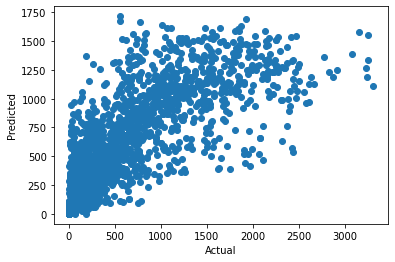

In [77]:
plt.scatter(np.square(y_test),np.square( y_test_pred_lasso))
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Linear Regression-Rigde

In [78]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [79]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -57.95053221567737


In [80]:
y_train_pred_ridge = ridge_regressor.predict(X_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)

In [81]:
# Evaluation of training Data for lasso
print_metrics(np.square(y_train),np.square(y_train_pred_ridge))
print("Adjusted R2 is ",1-(1-r2_score(np.square(y_train), np.square(y_train_pred_ridge)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 186295.73550149275
RMSE is 431.6198970176106
R2 is 0.5513573347642144
MAE is 289.71633144505546
MAPE is inf
Adjusted R2 is  0.5507161418740676


In [82]:
# Test dataset metrics for ridge
print_metrics(np.square(y_test), np.square(y_test_pred_ridge))
print("Adjusted R2 is ",1-(1-r2_score(np.square(y_test), np.square(y_test_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 190466.9642174784
RMSE is 436.42521033675223
R2 is 0.5449063695202424
MAE is 290.8976090781417
MAPE is inf
Adjusted R2 is  0.5422923911717085


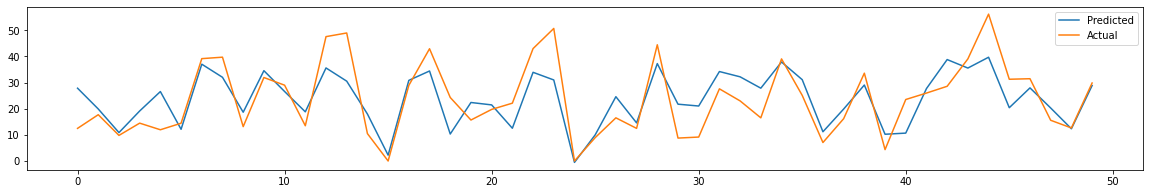

In [83]:
plt.figure(figsize=(20,3))
plt.plot((y_test_pred_ridge[100:150]))
plt.plot((np.array(y_test[100:150])))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'Predicted')

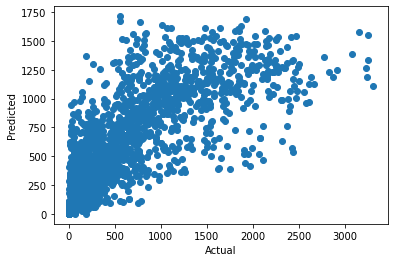

In [84]:
plt.scatter(np.square(y_test),np.square( y_test_pred_ridge))
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [86]:
tree.score(X_train,y_train)

0.9999834895767606

In [87]:
tree.score(X_test,y_test)

0.7999338509952418

In [88]:
y_test_pred_decision = tree.predict(X_test)
y_train_pred_decision = tree.predict(X_train)

In [89]:
# Test dataset metrics for Decision tree
print_metrics(np.square(y_test), np.square(y_test_pred_decision))
print("Adjusted R2 is ",1-(1-r2_score(np.square(y_test), np.square(y_test_pred_decision)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 104883.88584474886
RMSE is 323.8578173284518
R2 is 0.7493949221902334
MAE is 189.21803652968038
MAPE is 58.378053120630625
Adjusted R2 is  0.7479554903820211


Text(0, 0.5, 'Predicted')

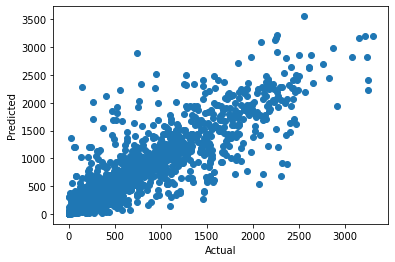

In [90]:
plt.scatter(np.square(y_test), np.square(y_test_pred_decision))
plt.xlabel('Actual')
plt.ylabel('Predicted')

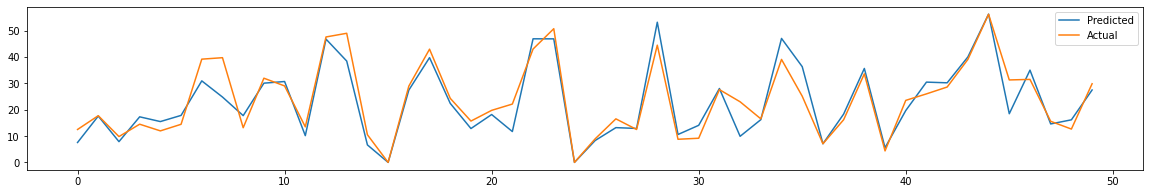

In [91]:
plt.figure(figsize=(20,3))
plt.plot((y_test_pred_decision[100:150]))
plt.plot((np.array(y_test[100:150])))
plt.legend(["Predicted","Actual"])
plt.show()

In [92]:
tree.feature_importances_

array([0.26218702, 0.28938148, 0.021218  , 0.03787266, 0.04009233,
       0.11857383, 0.00464767, 0.08035922, 0.00380893, 0.14185886])

In [93]:
features = X.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

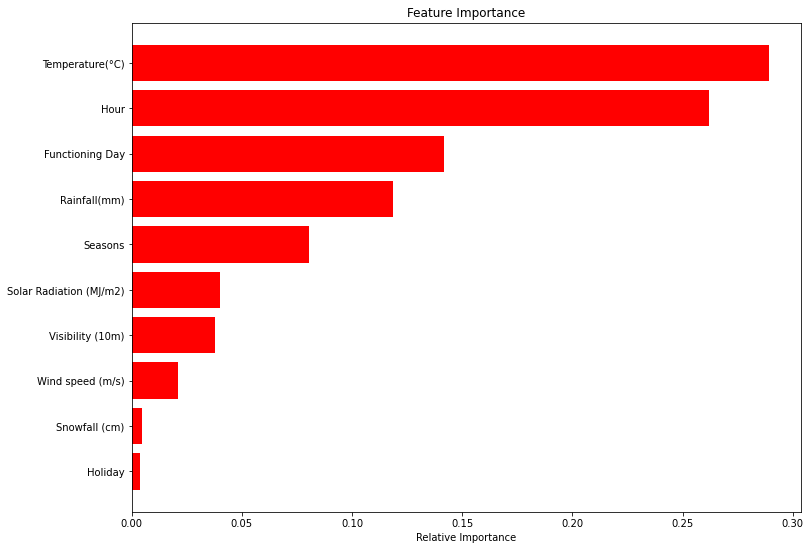

In [94]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
Rf_reg = RandomForestRegressor() 
# grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
# Rfreg = GridSearchCV(Rfreg, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
Rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [97]:
Rf_reg.score(X_train,y_train)

0.9830064732875351

In [98]:
Rf_reg.score(X_test,y_test)

0.8866552982194623

In [99]:
y_test_pred_rf = Rf_reg.predict(X_test)
y_train_pred_rf = Rf_reg.predict(X_train)

In [100]:
# Test dataset metrics for Decision tree
print_metrics(np.square(y_test), np.square(y_test_pred_rf))
print("Adjusted R2 is ",1-(1-r2_score(np.square(y_test), np.square(y_test_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 58418.65294757155
RMSE is 241.69950961384168
R2 is 0.8604169653941088
MAE is 144.7038403452585
MAPE is inf
Adjusted R2 is  0.8596152248162462


Text(0, 0.5, 'Predicted')

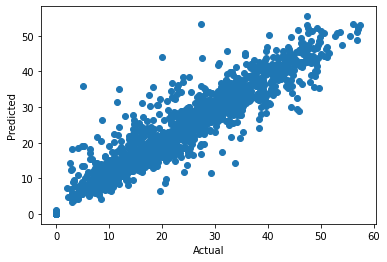

In [101]:
plt.scatter(y_test, y_test_pred_rf)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [102]:
Rf_reg.feature_importances_

array([0.24762497, 0.29913196, 0.0231716 , 0.03680488, 0.05425885,
       0.11616307, 0.00406979, 0.06337207, 0.0031811 , 0.1522217 ])

In [103]:
features = X.columns
importances = Rf_reg.feature_importances_
indices = np.argsort(importances)

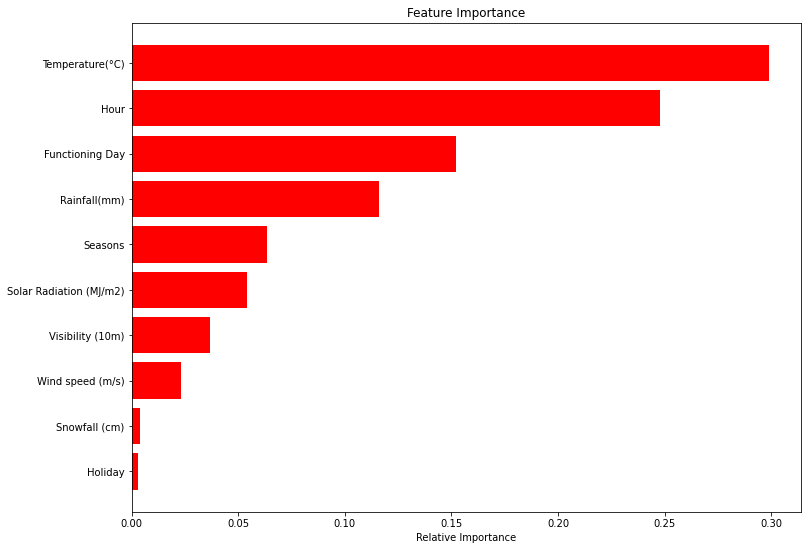

In [104]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()